# Reading & visualizaing raw data, cropping, filtering, and saving

## Import the few packages we'll need

In [1]:
import matplotlib
import pathlib
import mne
import PyQt5

Ensure Matplotlib uses the `Qt5Agg` backend, which is the best choice for MNE-Python's interactive plotting functions.

In [2]:
# matplotlib.use('Qt5Agg')

Retrieve the storage location of the `sample` data, and download the dataset if it cannot be found.

In [3]:
sample_data_dir = mne.datasets.sample.data_path()

# Convert to a pathlib.Path for more convenience
sample_data_dir = pathlib.Path(sample_data_dir)
sample_data_dir

PosixPath('/Users/zionshane/mne_data/MNE-sample-data')

## Load some raw data!

In [4]:
raw_path = sample_data_dir / 'MEG' / 'sample' / 'sample_audvis_raw.fif'
raw = mne.io.read_raw(raw_path)
raw

Opening raw data file /Users/zionshane/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.


<Raw | sample_audvis_raw.fif, 376 x 166800 (277.7 s), ~3.3 MB, data not loaded>

## Let's visualize the raw data!

Using matplotlib as 2D backend.


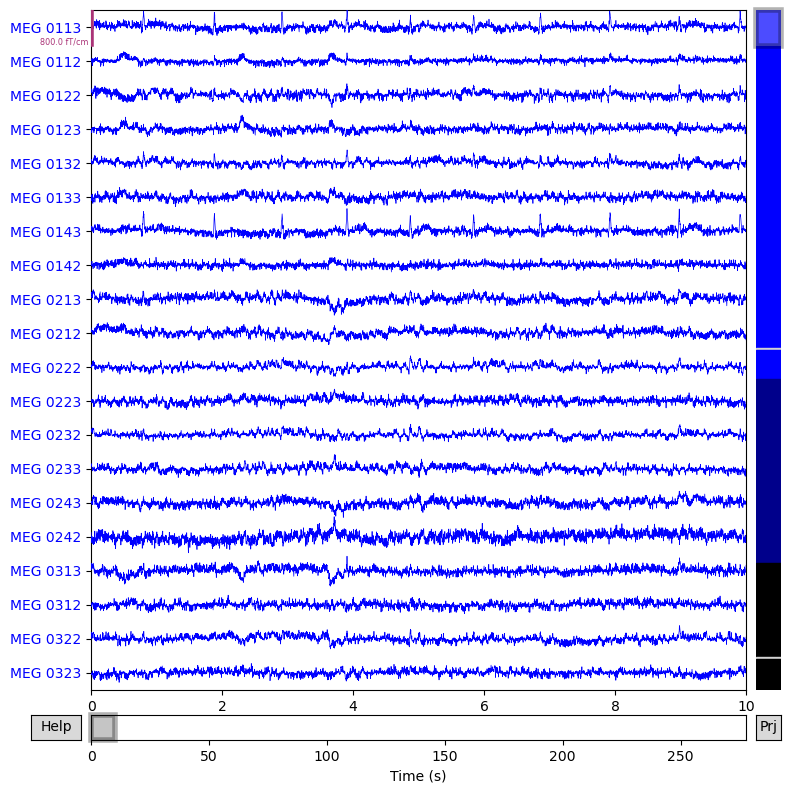

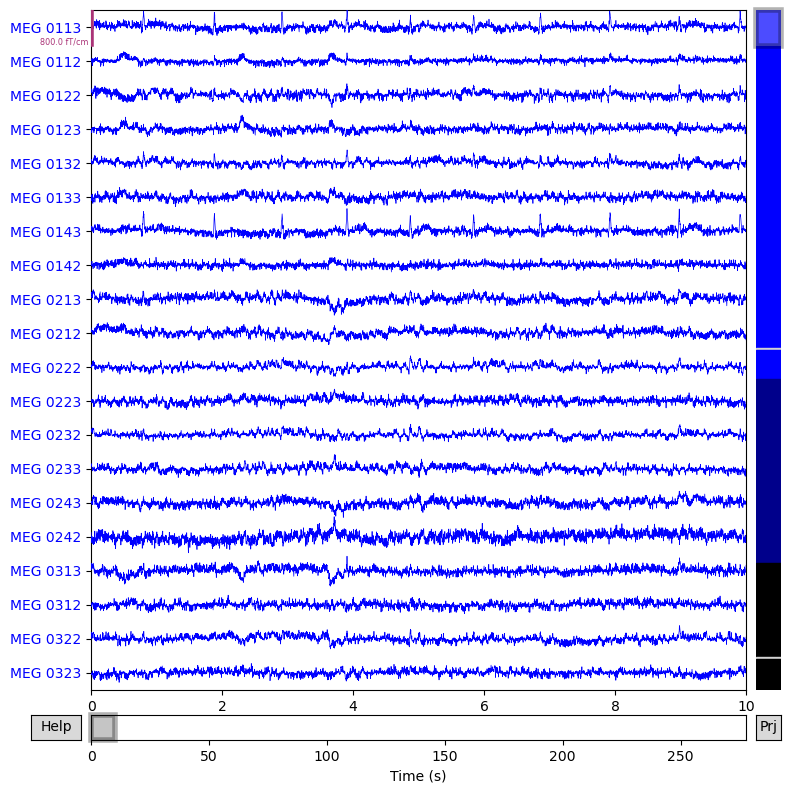

In [5]:
raw.plot()

## Extract events from the `STIM` channels

In [6]:
events = mne.find_events(raw)

320 events found
Event IDs: [ 1  2  3  4  5 32]


In [7]:
event_id = {
    'Auditory/Left': 1,
    'Auditory/Right': 2,
    'Visual/Left': 3,
    'Visual/Right': 4,
    'Smiley': 5,
    'Button': 32
}
event_id

{'Auditory/Left': 1,
 'Auditory/Right': 2,
 'Visual/Left': 3,
 'Visual/Right': 4,
 'Smiley': 5,
 'Button': 32}

In [8]:
len(events[events[:, 2] == 32])

16

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>How many <strong>visual</strong> events are in the data?</li>
    </ul>
</div>

## Plot the raw data again, but add event markers

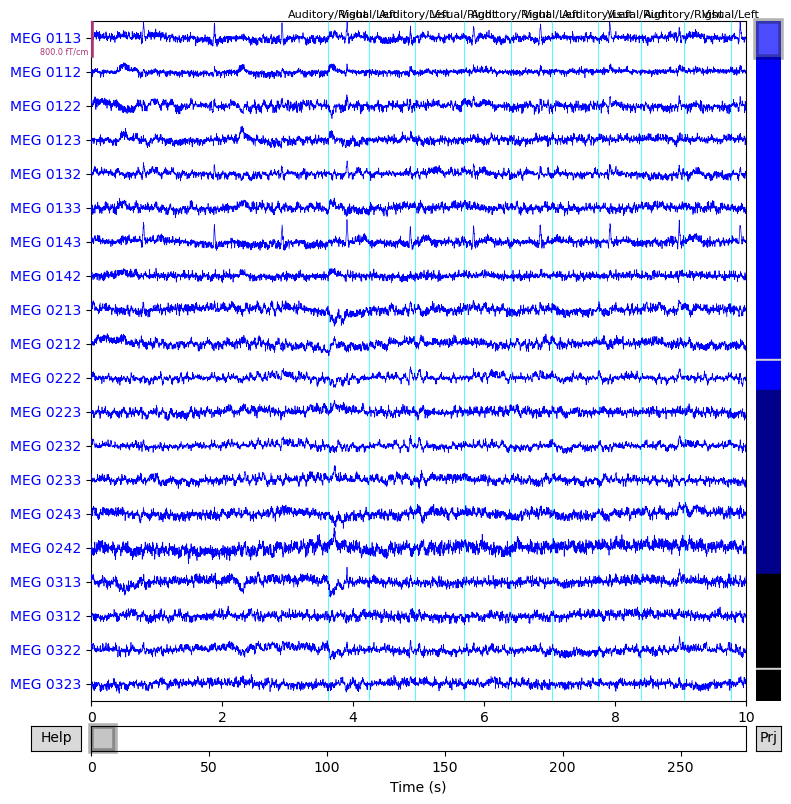

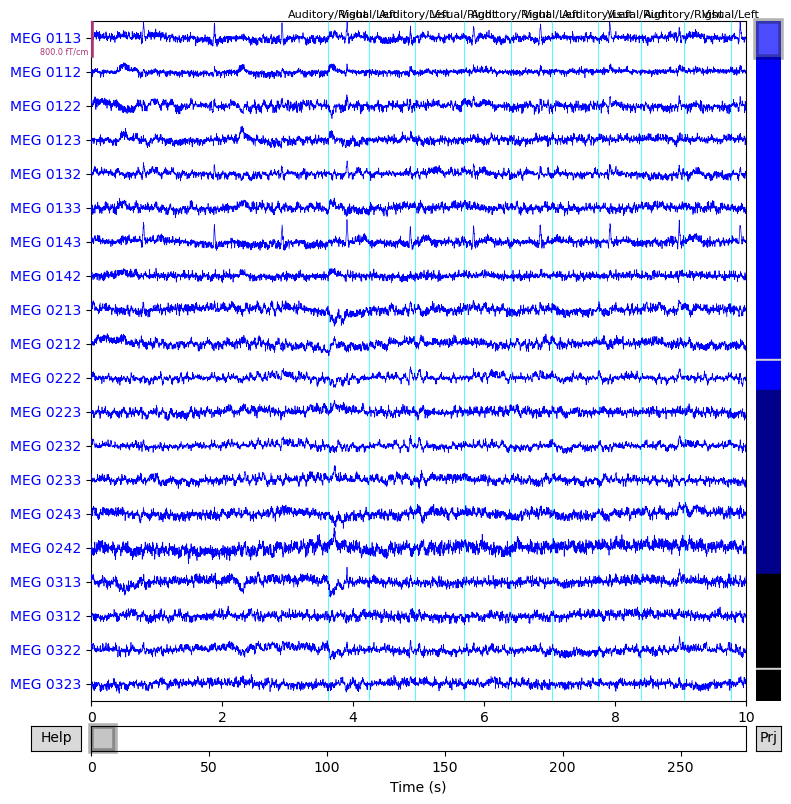

In [9]:
raw.plot(events=events, event_id=event_id)

## Gather some info about the data

In [10]:
raw.info

<Info | 21 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (MEG 2443, EEG 053)
 ch_names: MEG 0113, MEG 0112, MEG 0111, MEG 0122, MEG 0123, MEG 0121, MEG ...
 chs: 204 Gradiometers, 102 Magnetometers, 9 Stimulus, 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 376
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: PCA-v1: off, PCA-v2: off, PCA-v3: off
 sfreq: 600.6 Hz
>

In [11]:
raw.info['meas_date']

datetime.datetime(2002, 12, 3, 19, 1, 10, 720100, tzinfo=datetime.timezone.utc)

In [12]:
raw.info['sfreq']

600.614990234375

In [13]:
raw.info['bads']

['MEG 2443', 'EEG 053']

In [14]:
raw.ch_names[:10]

['MEG 0113',
 'MEG 0112',
 'MEG 0111',
 'MEG 0122',
 'MEG 0123',
 'MEG 0121',
 'MEG 0132',
 'MEG 0133',
 'MEG 0131',
 'MEG 0143']

In [15]:
raw.info['chs'][0]

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 0.00030517578125,
 'cal': 3.1600000394149674e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.0127    ,  0.0057    ,
        -0.99990302, -0.186801  , -0.98240298, -0.0033    , -0.98232698,
         0.18674099,  0.013541  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG 0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

## Visualize the sensor locations

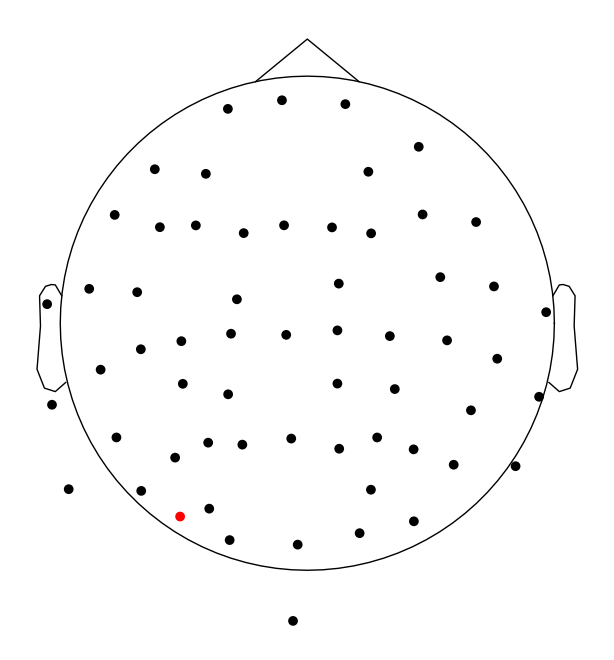

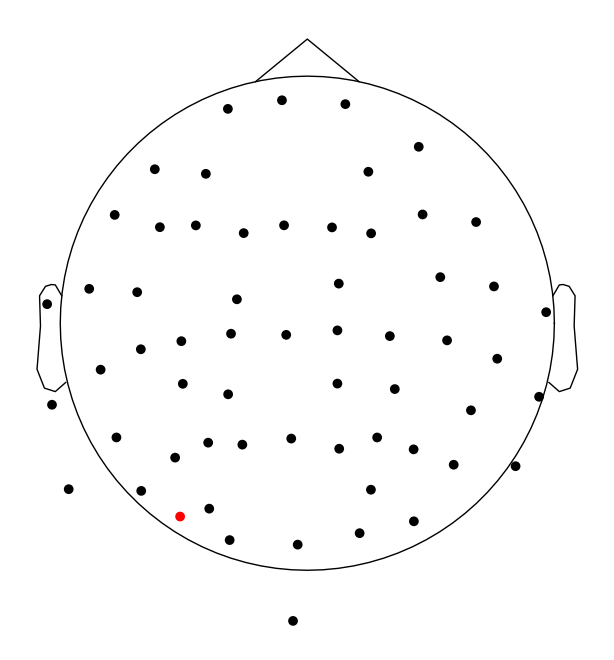

In [16]:
raw.plot_sensors(ch_type='eeg')

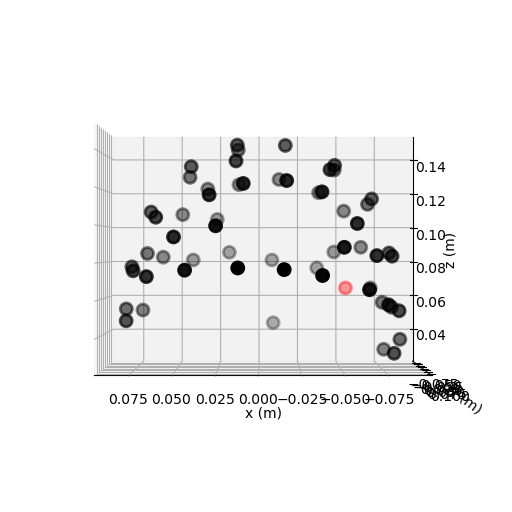

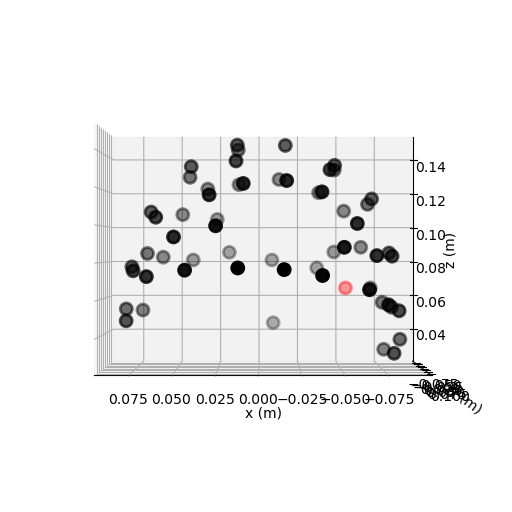

In [17]:
raw.plot_sensors(kind='3d', ch_type='eeg')

## Mark channels as bad

Mark an additional EEG channel as bad and view the topoplot.

In [18]:
raw.info['bads']

['MEG 2443', 'EEG 053']

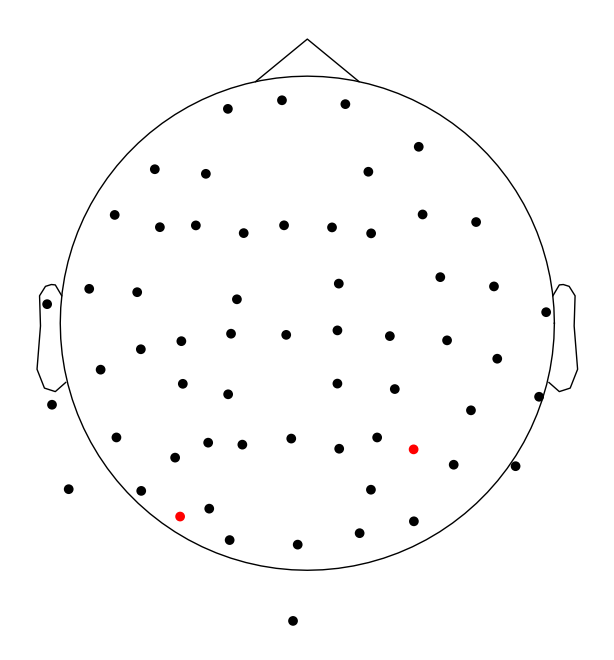

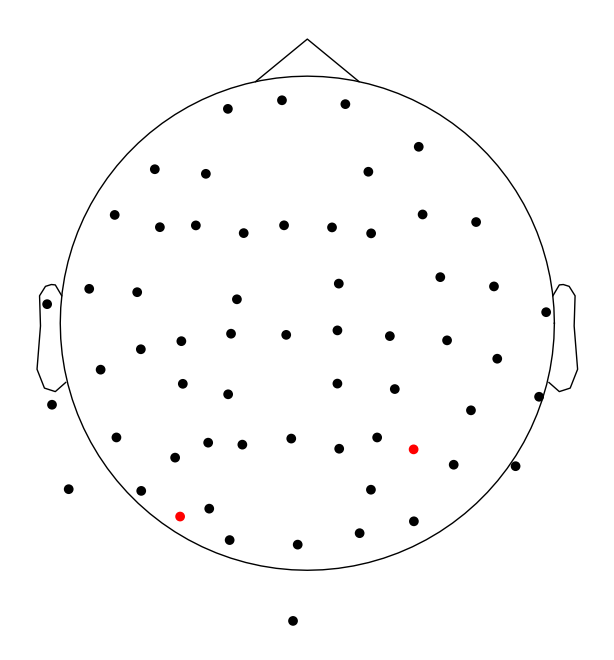

In [19]:
raw.info['bads'] += ['EEG 051']
raw.plot_sensors(ch_type='eeg')

## Select only a subset of the channels

In [20]:
raw_eeg = raw.copy().pick_types(meg=False, eeg=True, eog=True, exclude=[])
len(raw_eeg.ch_names)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).
Removing projector <Projection | PCA-v1, active : False, n_channels : 102>
Removing projector <Projection | PCA-v2, active : False, n_channels : 102>
Removing projector <Projection | PCA-v3, active : False, n_channels : 102>


61

In [21]:
raw_eeg.info

<Info | 20 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: 2 items (EEG 053, EEG 051)
 ch_names: EEG 001, EEG 002, EEG 003, EEG 004, EEG 005, EEG 006, EEG 007, ...
 chs: 60 EEG, 1 EOG
 custom_ref_applied: False
 description: acquisition (megacq) VectorView system at NMR-MGH
 dev_head_t: MEG device -> head transform
 dig: 146 items (3 Cardinal, 4 HPI, 61 EEG, 78 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.1 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 lowpass: 172.2 Hz
 meas_date: 2002-12-03 19:01:10 UTC
 meas_id: 4 items (dict)
 nchan: 61
 proj_id: 1 item (ndarray)
 proj_name: test
 projs: []
 sfreq: 600.6 Hz
>

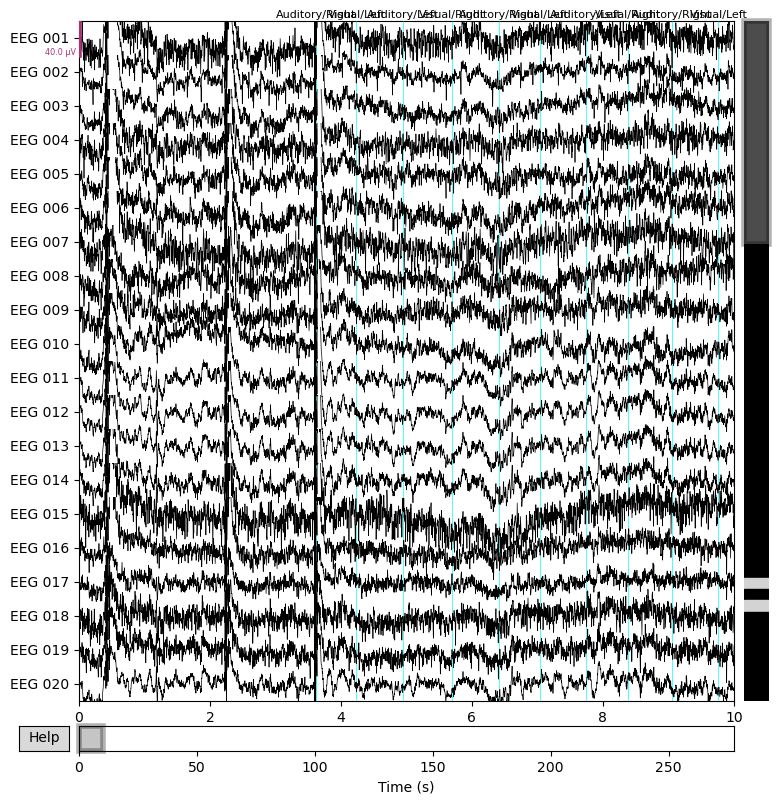

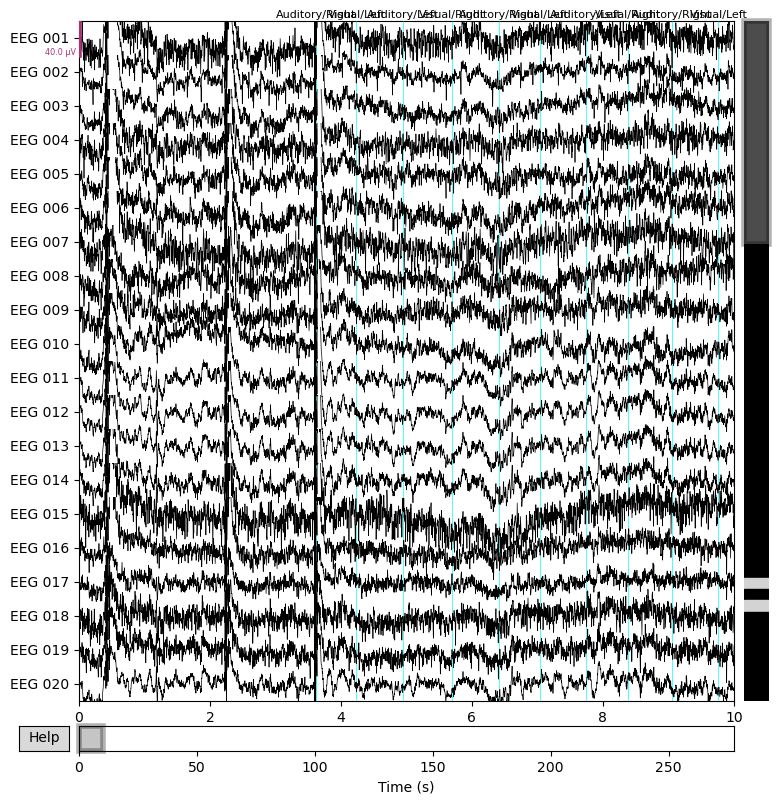

In [22]:
raw_eeg.plot(events=events, event_id=event_id)

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Select only MEG channels ("meg")</li>
         <li>Select only magnetometer channels ("mag")</li>
    </ul>
</div>

## Crop and filter the data

In [23]:
raw_eeg_cropped = raw_eeg.copy().crop(tmax=100)
raw_eeg_cropped.times[-1]

99.99916914588277

In [26]:
raw_eeg_cropped_filtered = raw_eeg_cropped.filter(l_freq=0.1, h_freq=40)

RuntimeError: By default, MNE does not load data into main memory to conserve resources. inst.filter requires raw data to be loaded. Use preload=True (or string) in the constructor or raw.load_data().

In [ ]:
raw_eeg_cropped.load_data()
raw_eeg_cropped_filtered = raw_eeg_cropped.copy().filter(l_freq=0.1, h_freq=40)

In [ ]:
raw_eeg_cropped.plot(events=events, event_id=event_id)
raw_eeg_cropped_filtered.plot(events=events, event_id=event_id)

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2)

raw_eeg_cropped.plot_psd(ax=ax[0], show=False)
raw_eeg_cropped_filtered.plot_psd(ax=ax[1], show=False)

ax[0].set_title('PSD before filtering')
ax[1].set_title('PSD after filtering')
ax[1].set_xlabel('Frequency (Hz)')
fig.set_tight_layout(True)
plt.show()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
         <li>Filter the raw data with a 1 Hz high-pass and a 30 Hz low-pass filter and plot the PSD.</li>
    </ul>
</div>

## Save the data

In [ ]:
raw_eeg_cropped_filtered.save(pathlib.Path('out_data') / 'eeg_cropped_filt_raw.fif', 
                              overwrite=True)